# Bases de datos sobre lenguas de Sudamérica

## A. SAILS
### https://sails.clld.org/

### Leemos los datos desde 
### https://github.com/cldf-datasets/sails

#### Lenguas en SAILS

In [1]:
## usemos pandas

import pandas as pd

In [2]:
## lenguas

languages = pd.read_csv('languages.csv',sep=',')

In [3]:
languages

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code
0,NOCODE_Apolista,Apolista,NaN,-14.830000,-68.660000,apol1242,NaN
1,NOCODE_Maipure,Maipure,NaN,4.800000,-67.500000,maip1246,NaN
2,aca,Achagua,NaN,4.386490,-72.200500,acha1250,aca
3,acu,Achuar-Shiwiar,NaN,-2.826455,-77.264050,achu1248,acu
4,agr,Aguaruna,NaN,-5.300440,-77.921790,agua1253,agr
...,...,...,...,...,...,...,...
162,yrl,Nhengatu,NaN,1.045027,-66.964553,nhen1239,yrl
163,yuq,Yuqui,NaN,-16.787520,-64.943820,yuqu1240,yuq
164,yuz,Yuracaré,NaN,-16.747880,-65.122410,yura1255,yuz
165,yvt,Yavitero,NaN,2.800281,-68.084219,yavi1244,yvt


In [4]:
## diccionario ID:Glottocode
## usamos esto más adelante: los rasgos están en formato ID

id_glotto = languages[['ID','Glottocode']]
id_glotto = dict(zip(languages['ID'],languages['Glottocode']))

In [5]:
## diccionario glottocode: [name,latitude,longitude]

glotto_geo = languages[['Glottocode','ID','Name','Latitude','Longitude']]

In [6]:
## transformamos a diccionario

glotto = list(glotto_geo['Glottocode'])
id_iso = list(glotto_geo['ID'])
names = list(glotto_geo['Name'])
lat = list(glotto_geo['Latitude'])
lon = list(glotto_geo['Longitude'])

glotto_geo_pairs = []

for i in range(len(glotto)):
    glotto_geo_pairs += [[glotto[i],id_iso[i],names[i],lat[i],lon[i]]]

glotto_geo = {item[0]:[item[1],item[2],item[3],item[4]] for item in glotto_geo_pairs}

In [7]:
## número de lenguas en SAILS

len(glotto_geo)

167

#### Mapa de las lenguas en SAILS

In [8]:
## mapa de las lenguas
## usemos lingtypology
## https://oneadder.github.io/lingtypology/html/index.html

!pip install lingtypology

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
import lingtypology

glotto_languages = list(glotto_geo.keys())

m = lingtypology.LingMap((glotto_languages),glottocode=True)
#m.add_features([unesco_aes[v] for v in list(all_dict.values())],radius=5, opacity=1,factor=('not endangered', 'threatened', 'shifting', 'moribund', 'nearly extinct', 'extinct'),colors=lingtypology.gradient(6, 'white', 'red'))
m.start_location = 'South America'
m.legend_title = 'Languages in SAILS'
m.create_map()

In [10]:
m.save('map_sails.html')

#### Rasgos en SAILS

In [11]:
## rasgos

features = pd.read_csv('values.csv',sep=',')

In [12]:
features

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Contributor,Reference,Example_Reference
0,ARW1-NOCODE_Apolista,NOCODE_Apolista,ARW1,?,ARW1-NK,NaN,NaN,Swintha Danielsen 2008-05-25,NaN,NaN
1,ARW1-1-03a-NOCODE_Apolista,NOCODE_Apolista,ARW1-1-03a,1,ARW1-1-03a-0,NaN,NaN,Swintha Danielsen 2008-05-25,NaN,NaN
2,ARW1-1-03b-NOCODE_Apolista,NOCODE_Apolista,ARW1-1-03b,1,ARW1-1-03b-NK,NaN,NaN,Swintha Danielsen 2008-05-25,NaN,NaN
3,ARW1-1-05-NOCODE_Apolista,NOCODE_Apolista,ARW1-1-05,1,ARW1-1-05-1,NaN,NaN,Swintha Danielsen 2008-05-25,NaN,NaN
4,ARW1-1-06-NOCODE_Apolista,NOCODE_Apolista,ARW1-1-06,1,ARW1-1-06-NK,NaN,NaN,Swintha Danielsen 2008-05-25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31787,FFQ5-zro,zro,FFQ5,N,FFQ5-N,NaN,NaN,Rik van Gijn 2012,NaN,NaN
31788,FFQ6-zro,zro,FFQ6,N,FFQ6-N,NaN,NaN,Rik van Gijn 2012,NaN,NaN
31789,FFQ7-zro,zro,FFQ7,N,FFQ7-N,3 over 2,NaN,Rik van Gijn 2012,NaN,NaN
31790,FFQ8-zro,zro,FFQ8,B,FFQ8-B,NaN,NaN,Rik van Gijn 2012,NaN,NaN


In [13]:
## filtramos el dataframe features
## Language_ID: identificador lengua, código iso + códigos de SAILS cuando no hay iso
## Parameter_ID: nombre del rasgos
## Value: valor del rasgos

features = features[['Language_ID','Parameter_ID','Value']]

In [14]:
## número de rasgos en SAILS

feature_names = set(features['Parameter_ID'])
print(len(feature_names))

604


In [15]:
## lenguas de SAILS
## glottocodes

languages_sails = list(glotto_geo.keys())

In [16]:
## diccionario para guardar los datos
## D = language_ID:{Paramater_ID:Value,...}

D = {lengua:{} for lengua in languages_sails}

In [17]:
## recorremos el dataframe features usando loc

for i in list(features.index):
    D[id_glotto[features.loc[i,'Language_ID']]][features.loc[i,'Parameter_ID']]=features.loc[i,'Value']

In [18]:
## promedio y desviación estándar de rasgos x lengua en SAILS
import numpy as np

feature_values = list(D.values())
feature_values_mean, feature_values_std = np.mean([len(L) for L in feature_values]),np.std([len(L) for L in feature_values])
print(feature_values_mean)
print(feature_values_std)

190.37125748502993
99.79070859139755


In [19]:
## promedio y desviación estándar de rasgos distintos de "?" x lengua en SAILS

feature_values = list(D.values())
feature_values_mean_non, feature_values_std_non = np.mean([len([key for key in L.keys() if L[key]!='?']) for L in feature_values]),np.std([len([key for key in L.keys() if L[key]!='?']) for L in feature_values])
print(feature_values_mean_non)
print(feature_values_std_non)

177.311377245509
97.41146166940655


In [20]:
## veamos los datos en un csv

pd.DataFrame.from_dict(D).to_csv('features_sails.csv')

In [21]:
## histograma de rasgos
import seaborn as sns

feature_values = list(D.values())
## rasgos distintos de '?'
feature_values_hist = [len([key for key in L.keys() if L[key]!='?']) for L in feature_values]

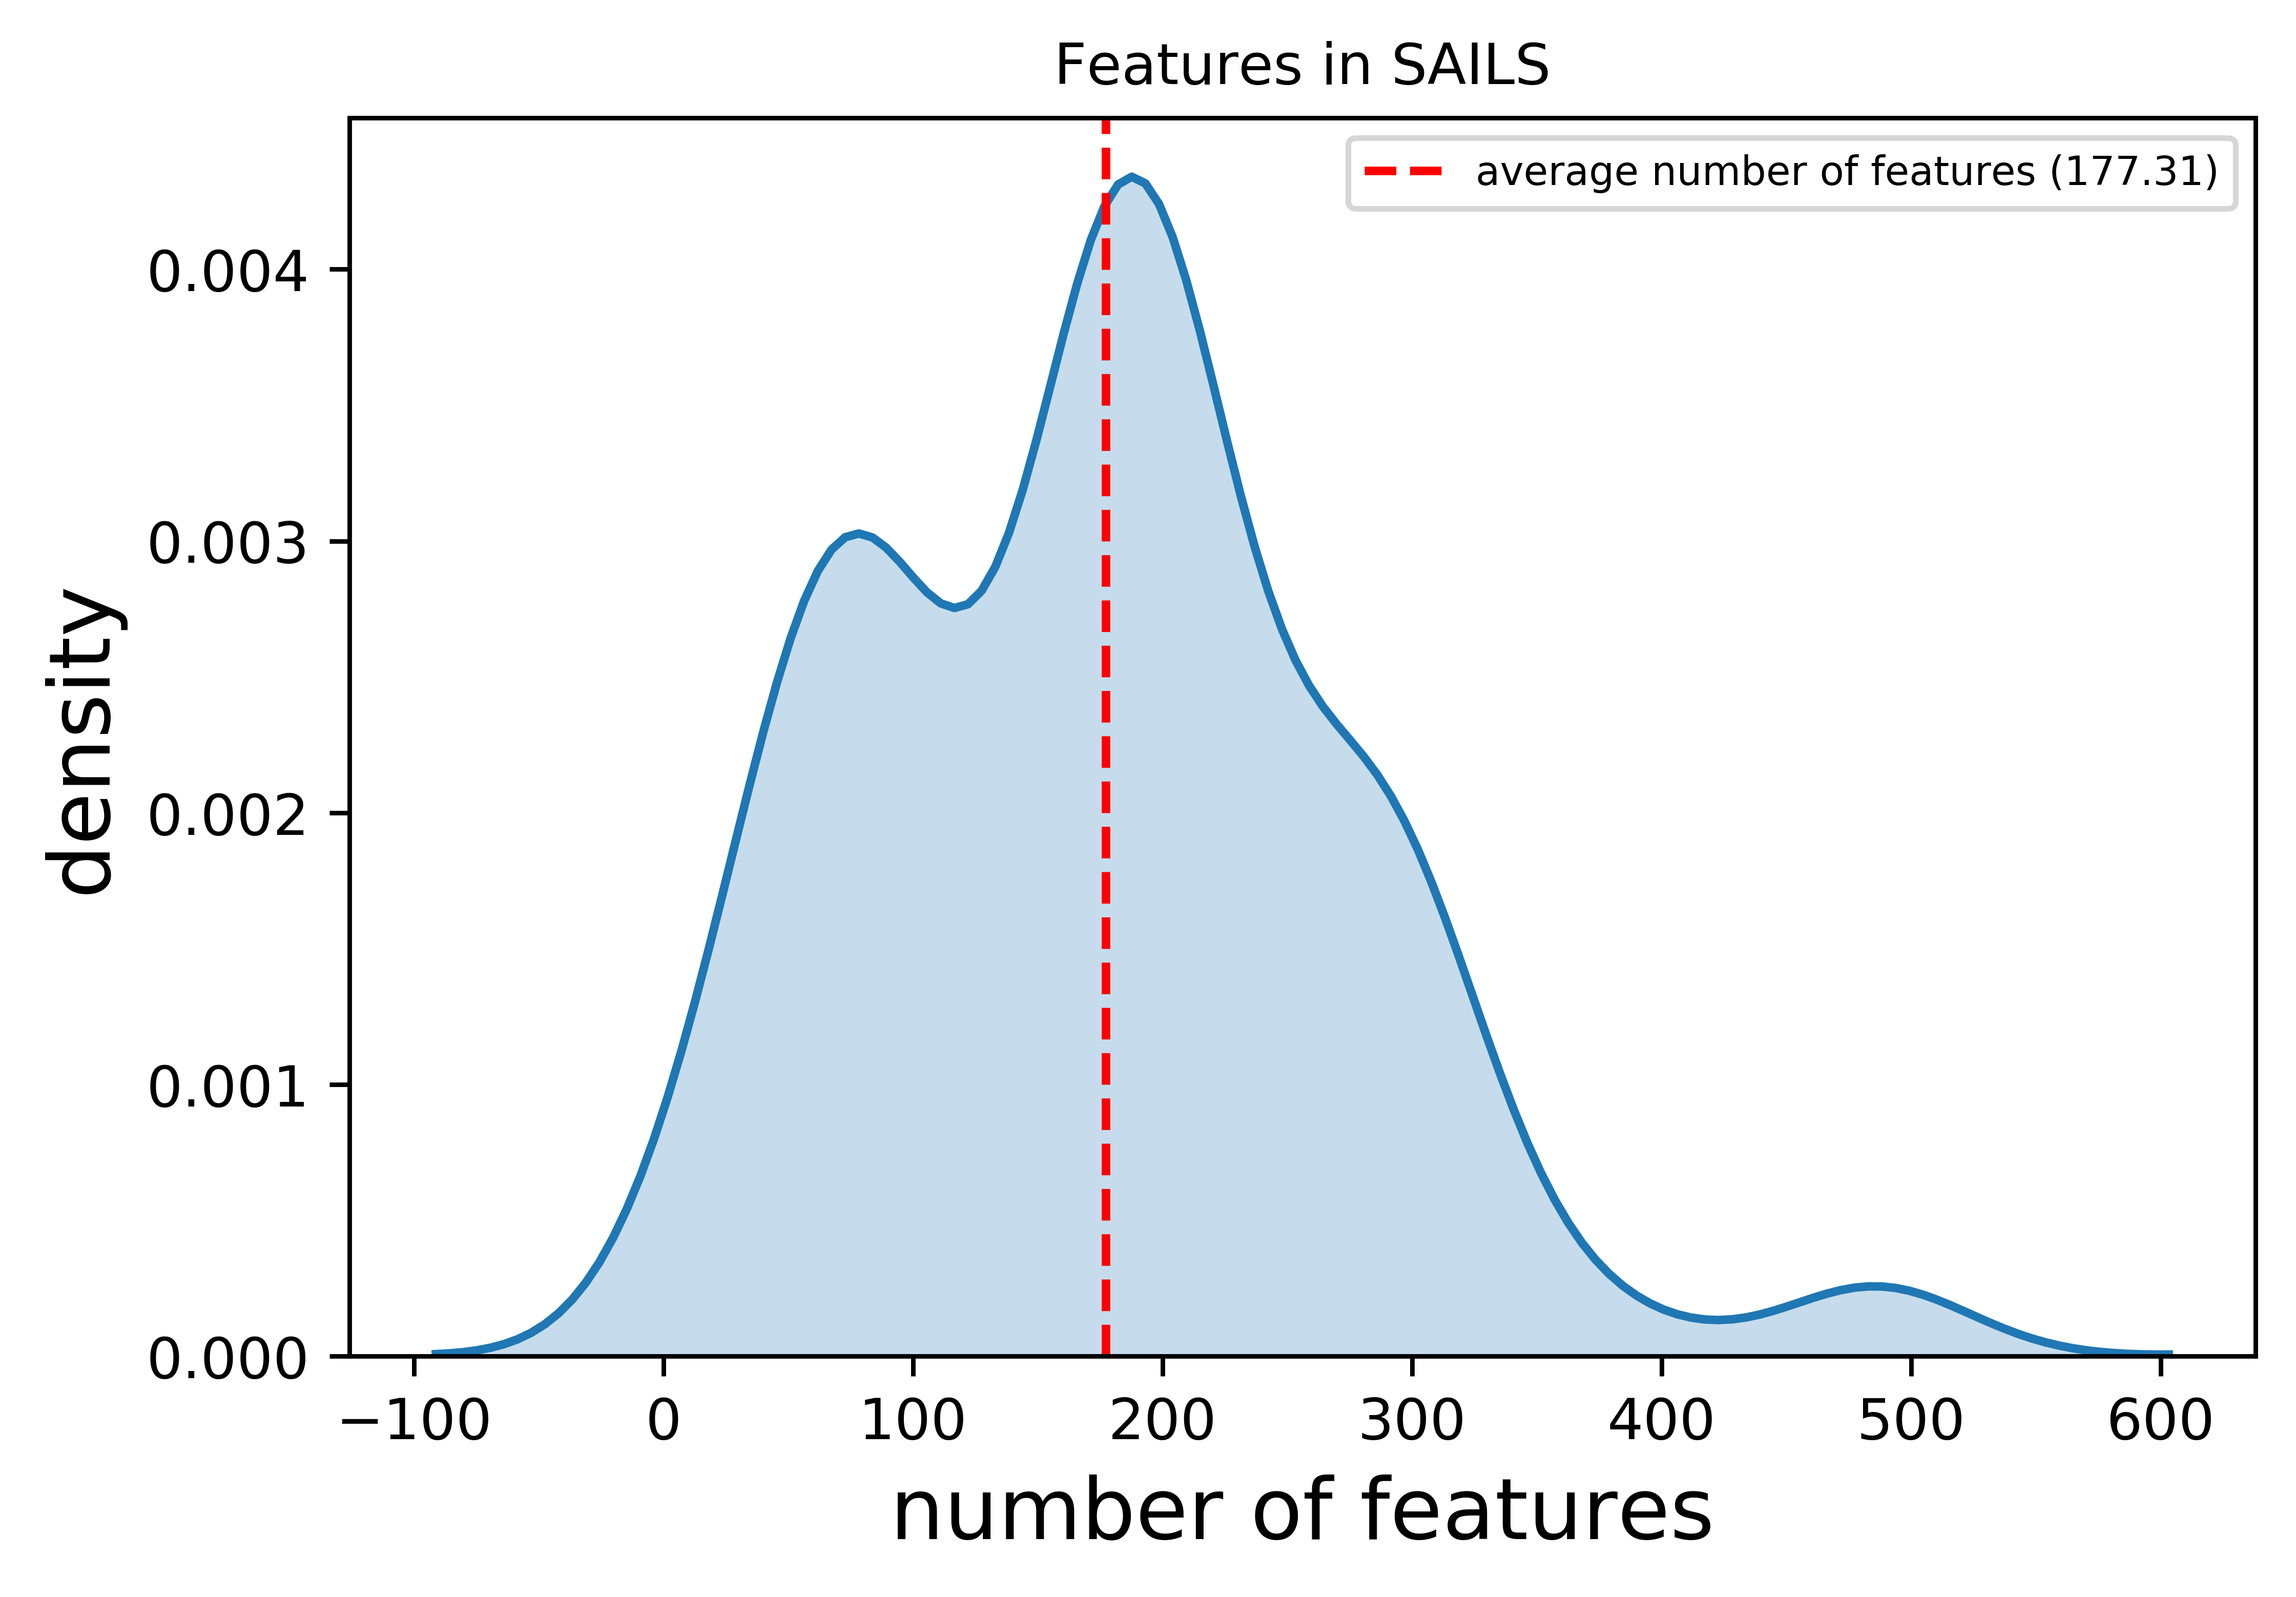

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

sns.kdeplot(feature_values_hist,shade=True)
plt.axvline(feature_values_mean_non, linestyle='--',color='red',label='average number of features ({})'.format(np.round(feature_values_mean_non,2)))

plt.legend(loc='best',fontsize=7)
plt.title('Features in SAILS',fontsize=10)
plt.ylabel(r'density',fontsize=15)
plt.xlabel(r'number of features',fontsize=15)
plt.savefig('features.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.rcParams.update({'font.size': 10})
plt.show()

#### Rasgos y familias lingüísticas en SAILS

In [23]:
## miramos languoids 
## https://glottolog.org/meta/downloads

languoid = pd.read_csv('languoid.csv',sep=',')

In [24]:
## filtramos id (glottocode):family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [25]:
## transformamos a diccionario
## filtramos por lenguas en glotto_geo.keys()

id_family = dict(zip(id_family['id'], id_family['family_id']))
id_family = {language:id_family[language] for language in id_family.keys() if language in languages_sails}

In [26]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(id_family.items()):
    v[value].append(key)

In [27]:
## diccionario de familias representadas en SAILS

families = dict(v)

In [28]:
families

{'araw1281': ['acha1250',
  'apol1242',
  'apur1254',
  'araw1276',
  'asha1243',
  'ashe1272',
  'bani1254',
  'bare1276',
  'baur1253',
  'cham1318',
  'curr1243',
  'enaw1238',
  'gari1256',
  'guan1270',
  'guar1293',
  'igna1246',
  'inap1243',
  'isla1278',
  'mach1267',
  'maip1246',
  'mash1270',
  'mehi1240',
  'nant1250',
  'noma1263',
  'pali1279',
  'pare1272',
  'paun1241',
  'piap1246',
  'resi1247',
  'sara1331',
  'tain1254',
  'tari1256',
  'tere1279',
  'wapi1253',
  'waur1244',
  'wayu1243',
  'yane1238',
  'yavi1244',
  'yucu1253'],
 'jiva1245': ['achu1248', 'agua1253', 'shua1257'],
 'hara1260': ['amar1274'],
 'cari1283': ['apal1257', 'enap1235', 'hixk1239', 'ikpe1245', 'trio1238'],
 'zapa1251': ['arab1268', 'iqui1243', 'zapa1253'],
 'chib1249': ['arhu1242',
  'chim1309',
  'mala1522',
  'ngab1239',
  'pech1241',
  'rama1270',
  'sanb1242',
  'teri1250'],
 'barb1265': ['awac1239', 'colo1256'],
 'tupi1275': ['awet1244',
  'coca1259',
  'emer1243',
  'gavi1246',
  'ju